### Classifiying Recipe Difficulty with LDA-components...
- http://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
- http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html**
- http://stackoverflow.com/questions/26825729/extract-number-from-string-python

REF `recipes_runNLTK_LDA_ClassifyPrepDiff_FindCompTokens_v0.ipynb`

In [1]:
import pandas as pd
import numpy as np


In [ ]:
# filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/'#bbc_goodfood_recipes_pickles/'

In [2]:
Ing = pd.read_pickle('RecipesIng4modelling_Dataframe_mar2017.pkl')

In [3]:
Ing

,title,method,ingred,Ningred,prepTime,cookTime,prepDifficulty
0,Lemon drizzle cake,Heat oven to 180C/fan 160C/gas 4. Beat togethe...,unsalted butter sugar egg lemon self-raising f...,7,15.0,45.0,Easy
1,Chilli con carne,Prepare your vegetables. Chop 1 large onion in...,oil onion red pepper garlic hot chilli powder ...,16,70.0,25.0,Easy
2,Ultimate chocolate cake,Butter a 20cm round cake tin (7.5cm deep) and ...,dark-chocolate butter instant coffee granules ...,15,40.0,90.0,Easy
3,Best-ever brownies,Cut 185g unsalted butter into smallish cubes a...,unsalted butter best dark-chocolate plain flou...,8,15.0,25.0,More effort
4,Yummy scrummy carrot cake,Preheat the oven to 180C/Gas 4/fan 160C. Oil a...,light muscovado sugar sunflower oil eggs raisi...,11,75.0,25.0,Easy
5,Chicken & chorizo jambalaya,Heat the oil in a large frying pan with a lid ...,olive oil chicken breast onion red pepper garl...,10,10.0,45.0,Easy
6,Spiced carrot & lentil soup,Heat a large saucepan and dry-fry the cumin se...,cumin seeds chilli flakes olive oil red lentil...,7,10.0,15.0,Easy
7,Spicy root & lentil casserole,Heat the oil in a large pan and cook the onion...,oil onion garlic clove potatoes carrot parsnip...,11,10.0,35.0,Easy
8,Summer-in-winter chicken,"Heat the oil in a frying pan, preferably non-s...",olive oil boneless chicken breast cherry tomat...,6,15.0,25.0,Easy
9,Classic scones with jam & clotted cream,Heat oven to 220C/fan 200C/gas 7. Tip the flou...,self-raising flour salt baking powder butter c...,10,5.0,10.0,Easy


In [4]:
Ing.prepDifficulty.value_counts()

Easy           8464
More effort    1364
A challenge     223
Name: prepDifficulty, dtype: int64

In [5]:
IDXeasy = Ing.prepDifficulty[Ing.prepDifficulty=='Easy'].to_frame()#.index.tolist()

IDXmoreEffort = Ing.prepDifficulty[Ing.prepDifficulty=='More effort'].to_frame()#.index.tolist()

IDXchallenge = Ing.prepDifficulty[Ing.prepDifficulty=='A challenge'].to_frame()#.index.tolist()


In [6]:
# IDXeasy.index.tolist()
# IDXmoreEffort.index.tolist()
# IDXchallenge.index.tolist()

# df_easy = Ing.ix[IDXeasy.index.tolist()][:400] #[:1200]# [:1400]#
# df_effort = Ing.ix[IDXmoreEffort.index.tolist()][:200] #[:1200]# [:1200]#
# df_challenge = Ing.ix[IDXchallenge.index.tolist()][:200]

# df = pd.concat([df_easy,df_effort,df_challenge],axis=0)
# print(df.shape) #(800, 7)


df_easy = Ing.ix[IDXeasy.index.tolist()][:1200]#
# df_easy = Ing.ix[IDXeasy.index.tolist()][:1400]#
df_effort = Ing.ix[IDXmoreEffort.index.tolist()][:1200]#
# df_challenge = Ing.ix[IDXchallenge.index.tolist()][:200]
df = pd.concat([df_easy,df_effort],axis=0)
# df = pd.concat([df_easy,df_effort,df_challenge],axis=0)
print(df.shape) #(2400, 7) #(3000, 7)

traintestIDLabel = df.prepDifficulty.to_frame()#.reset_index()
# traintestIDLabel.index.tolist()

(2400, 7)


In [ ]:
# traintestIDLabel

In [7]:
traintestIng = Ing.ix[traintestIDLabel.index.tolist()].ix[:,1:]

In [8]:
traintestIng

,method,ingred,Ningred,prepTime,cookTime,prepDifficulty
0,Heat oven to 180C/fan 160C/gas 4. Beat togethe...,unsalted butter sugar egg lemon self-raising f...,7,15.0,45.0,Easy
1,Prepare your vegetables. Chop 1 large onion in...,oil onion red pepper garlic hot chilli powder ...,16,70.0,25.0,Easy
2,Butter a 20cm round cake tin (7.5cm deep) and ...,dark-chocolate butter instant coffee granules ...,15,40.0,90.0,Easy
4,Preheat the oven to 180C/Gas 4/fan 160C. Oil a...,light muscovado sugar sunflower oil eggs raisi...,11,75.0,25.0,Easy
5,Heat the oil in a large frying pan with a lid ...,olive oil chicken breast onion red pepper garl...,10,10.0,45.0,Easy
6,Heat a large saucepan and dry-fry the cumin se...,cumin seeds chilli flakes olive oil red lentil...,7,10.0,15.0,Easy
7,Heat the oil in a large pan and cook the onion...,oil onion garlic clove potatoes carrot parsnip...,11,10.0,35.0,Easy
8,"Heat the oil in a frying pan, preferably non-s...",olive oil boneless chicken breast cherry tomat...,6,15.0,25.0,Easy
9,Heat oven to 220C/fan 200C/gas 7. Tip the flou...,self-raising flour salt baking powder butter c...,10,5.0,10.0,Easy
10,Heat a large saucepan and dry-fry the cumin se...,cumin seed chilli flakes olive oil onion red s...,10,10.0,25.0,Easy


In [9]:
X = traintestIng.ix[:,:5]
Y = traintestIng.ix[:,5].to_frame()
# X/Y

In [10]:
len(Y.prepDifficulty.unique().tolist())

2

In [11]:
Y['prepDiffnum'] = Y.prepDifficulty
Y['prepDiffnum'] = Y.prepDiffnum.apply(lambda x: int(x=='Easy'))
    

In [14]:
from sklearn.cross_validation import train_test_split ## could also use parameter stratify on y to test whole dataset

In [15]:
xtrain_0, xtest_hold, ytrain_0, ytest_hold = train_test_split(X, Y.prepDiffnum, train_size = 0.8, random_state=1234)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain_0, ytrain_0, train_size = 0.7, random_state=1234)

In [141]:
### LOAD Model Files
modelpath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/recipe-difficulty-tagger_MHP_App/models/'
# i_modelpicklepath = modelpath+"bbcgfd_ilda_tf_100Ingredtopics.pkl"
# m_modelpicklepath = modelpath+"bbcgfd_mlda_tf_80methodtopics.pkl"
i_modelpicklepath = modelpath+"bbcgfd_ilda_tf_100Ingredtopics_v01.pkl"
m_modelpicklepath = modelpath+"bbcgfd_mlda_tf_80methodtopics_v01.pkl"

# i_modelpicklepath = modelpath+"bbcgfd_ilda_tf_100Ingredtopics_v2.pkl"
# m_modelpicklepath = modelpath+"bbcgfd_mlda_tf_80methodtopics_v2.pkl"

In [142]:
## Use TO Retrieve NLP / LDA Models

# load nltk's SnowballStemmer as variabled 'stemmer'
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# define here a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    #tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens



In [143]:
### RETRIEVE OUTPUTS
import pickle

# # ilda_tf, Ingdtm_tf, itf_vectorizer, pyldavisI
# with open('bbcgfd_ilda_tf_100Ingredtopics.pkl', 'wb') as f:
#     pickle.dump(ilda_tf, f) #model
#     pickle.dump(Ingdtm_tf, f) #doc-token-vec
#     pickle.dump(itf_vectorizer, f) #vectorizer
#     pickle.dump(pyldavisItf, f) #pyLDAvis

# # mlda_tf, Methoddtm_tf, mtf_vectorizer, pyldavisM
# with open('bbcgfd_mlda_tf_80methodtopics.pkl', 'wb') as f:
#     pickle.dump(mlda_tf, f)
#     pickle.dump(Methoddtm_tf, f)
#     pickle.dump(mtf_vectorizer, f)
#     pickle.dump(pyldavisMtf, f)

    
with open(i_modelpicklepath, 'rb') as f:
    
    ilda_tf = pickle.load(f) #model
    Ingdtm_tf= pickle.load(f) #doc-token-vec
    itf_vectorizer= pickle.load(f) #vectorizer
    pyldavisItf= pickle.load(f) #pyLDAvis


with open(m_modelpicklepath, 'rb') as f:
    
    mlda_tf = pickle.load(f) #model
    Methoddtm_tf= pickle.load(f) #doc-token-vec
    mtf_vectorizer= pickle.load(f) #vectorizer
    pyldavisMtf= pickle.load(f) #pyLDAvis


In [ ]:
# ## Create list of 'stopwords' to ignore

# import re
# import os
# import codecs

# import nltk
# # load nltk's English stopwords as variable called 'stopwords'
# stopwords = nltk.corpus.stopwords.words('english')

# import string

# for s in string.punctuation: #'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
#     stopwords.extend(s)

#     stopwords.extend(['serve','plus','handful','small'])
    
#     ##updated model removed more chars
#     stopwords.extend(ingChars2ignore)
#     stopwords.extend(methdChars2ignore)
    
    

In [22]:
### 
import re

In [144]:
## Convert Raw string items to vec
## Apply LDA modelling... pick some components rather than all... 

iX_train_vec = itf_vectorizer.transform(xtrain.ingred)
print(iX_train_vec.shape)
# iX_train0 = pd.DataFrame(ilda_tfidf.transform(iX_train_vec))
iX_train0 = pd.DataFrame(ilda_tf.transform(iX_train_vec))
iX_train0.columns = ['i_'+str(i) for i in range(iX_train0.shape[1])]
iX_train00 = iX_train0#[iidx]
iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train00],axis=1)
# iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train_vec],axis=1)
print(iX_train.shape)


mX_train_vec = mtf_vectorizer.transform(xtrain.method)
print(mX_train_vec.shape)
# mX_train0 = pd.DataFrame(mlda_tfidf.transform(mX_train_vec))
mX_train0 = pd.DataFrame(mlda_tf.transform(mX_train_vec))
mX_train0.columns = ['m_'+str(m) for m in range(mX_train0.shape[1])]
mX_train = mX_train0#[[0,1,2,79]]
print(mX_train.shape)

# X_train_vec = hstack([iX_train_vec,mX_train_vec]).todense()#.toarray()
# print(X_train_vec.shape)
X_train = pd.concat([iX_train,mX_train],axis=1)
print(X_train.shape)


print()


iX_test_vec = itf_vectorizer.transform(xtest.ingred)
print(iX_test_vec.shape)
# iX_test0 = pd.DataFrame(ilda_tfidf.transform(iX_test_vec))
iX_test0 = pd.DataFrame(ilda_tf.transform(iX_test_vec))
iX_test0.columns = ['i_'+str(i) for i in range(iX_test0.shape[1])]
iX_test00 = iX_test0#[iidx]
iX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],iX_test00],axis=1)
# iX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],iX_test_vec],axis=1)
print(iX_test.shape)


mX_test_vec = mtf_vectorizer.transform(xtest.method)
print(mX_test_vec.shape)
# mX_test0 = pd.DataFrame(mlda_tfidf.transform(mX_test_vec))
mX_test0 = pd.DataFrame(mlda_tf.transform(mX_test_vec))
mX_test0.columns = ['m_'+str(m) for m in range(mX_test0.shape[1])]
mX_test = mX_test0#[[0,1,2,79]]
print(mX_test.shape)

# X_test_vec = hstack([iX_test_vec,mX_test_vec]).todense()#.toarray()
# print(X_test_vec.shape)
X_test = pd.concat([iX_test,mX_test],axis=1)
print(X_test.shape)


print()


iX_testhold_vec = itf_vectorizer.transform(xtest_hold.ingred)
print(iX_testhold_vec.shape)
# iX_testhold0 = pd.DataFrame(ilda_tfidf.transform(iX_testhold_vec))
iX_testhold0 = pd.DataFrame(ilda_tf.transform(iX_testhold_vec))
iX_testhold0.columns = ['i_'+str(i) for i in range(iX_testhold0.shape[1])]
iX_testhold00 = iX_testhold0#[iidx]
iX_testhold = pd.concat([xtest_hold.reset_index()[['Ningred','prepTime','cookTime']],iX_testhold00],axis=1)
# iX_testhold = pd.concat([xtest_hold.reset_index()[['Ningred','prepTime','cookTime']],iX_testhold_vec],axis=1)
print(iX_testhold.shape)

mX_testhold_vec = mtf_vectorizer.transform(xtest_hold.method)
print(mX_testhold_vec.shape)
# mX_testhold0 = pd.DataFrame(mlda_tfidf.transform(mX_testhold_vec))
mX_testhold0 = pd.DataFrame(mlda_tf.transform(mX_testhold_vec))
mX_testhold0.columns = ['m_'+str(m) for m in range(mX_testhold0.shape[1])]
mX_testhold = mX_testhold0#[[0,1,2,79]]
print(mX_testhold.shape)

# X_test_vec = hstack([iX_test_vec,mX_test_vec]).todense()#.toarray()
# print(X_test_vec.shape)
X_testhold = pd.concat([iX_testhold,mX_testhold],axis=1)
print(X_testhold.shape)



(1344, 741)
(1344, 103)
(1344, 1638)
(1344, 80)
(1344, 183)

(576, 741)
(576, 103)
(576, 1638)
(576, 80)
(576, 183)

(480, 741)
(480, 103)
(480, 1638)
(480, 80)
(480, 183)


In [145]:
len(ytest)

576

In [146]:
ytest.unique().tolist(), Y.prepDifficulty.unique().tolist()

([1, 0], ['Easy', 'More effort'])

In [25]:
# for plotting 
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

In [26]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
from sklearn import metrics

In [27]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        np.set_printoptions(precision=2, suppress=True)
        print(cm)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    np.set_printoptions(precision=2, suppress=True)    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#     print("{0:.2f}".format(a))


## example
# cnf_matrixGBT_hold = metrics.confusion_matrix(ytest_hold, yH_pred)
# plt.figure(figsize=[6,6])
# plot_confusion_matrix(cnf_matrixGBT, classes=ytest.unique(), normalize=True,
#                       title='Normalized confusion matrix')
# plt.grid(None)
# plt.show()

In [147]:
# import numpy as np
# import pandas as pd

# from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score

# from sklearn import Models
from sklearn import tree,ensemble,cross_validation

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


# numFolds = 5
# kf = KFold(len(X), numFolds, shuffle=True)

# Models = [LogisticRegression, SGDClassifier]
# params = [{}, {"loss": "log", "penalty": "l2"}]

models = {}
models['Logistic_Regression1'] =  LogisticRegression(penalty='l1', C=0.05, random_state=898) #C=1.0 #L1/2
models['Logistic_Regression2'] =  LogisticRegression(penalty='l2', C=0.05, random_state=898) #C=1.0 #L1/2

models['SGD_Classifier'] =  SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=42) # random_state=898)
                                          
# models['K_nearest_neighbours'] =  KNeighborsClassifier() #(n_neighbors=20)
# models['naive_bayes'] = GaussianNB()
models['naive_bayes'] = MultinomialNB()
# models['svc'] = SVC(probability=True)
# models['descision_tree'] = tree.DecisionTreeClassifier()
# models['descision_tree_cart'] = tree.DecisionTreeClassifier()
# models['extratrees'] = tree.ExtraTreeClassifier()
models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=100,criterion='gini',
                                                         max_depth=5,max_features=3,random_state=898)
# models['adaboostedTrees'] = ensemble.AdaBoostClassifier()
models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.025, n_estimators=55, 
                                                                 subsample=0.75, max_depth=5, 
                                                                 max_features=5, random_state=898)


In [148]:
for name, model in models.items():
                                          
    scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 5)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print ()
    

    mFit = model.fit(X_train, ytrain)
    y_pred = mFit.predict(X_test)
    #mFit.score(X_test,ytest)
    
    print('Model: '+name)
    # target_names=list(y_test.unique())))
    print(classification_report(ytest, y_pred))
    print ()
    
    
    if (name == "gradboostedTrees" or name == "RandomForest"):
        sorted_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    print("")



Model: Logistic_Regression1
Score: 0.701665649448

Model: Logistic_Regression1
             precision    recall  f1-score   support

          0       0.72      0.68      0.70       284
          1       0.70      0.74      0.72       292

avg / total       0.71      0.71      0.71       576



Model: Logistic_Regression2
Score: 0.755971608295

Model: Logistic_Regression2
             precision    recall  f1-score   support

          0       0.76      0.78      0.77       284
          1       0.78      0.76      0.77       292

avg / total       0.77      0.77      0.77       576



Model: SGD_Classifier
Score: 0.579513194046

Model: SGD_Classifier
             precision    recall  f1-score   support

          0       0.75      0.25      0.37       284
          1       0.56      0.92      0.69       292

avg / total       0.65      0.59      0.54       576



Model: naive_bayes
Score: 0.680839215735

Model: naive_bayes
             precision    recall  f1-score   support

         

In [149]:
shuffler = cross_validation.ShuffleSplit(n=100, n_iter=10, random_state=898)

for name,model in models.items(): #models.iteritems():
    score = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv=shuffler)
    print('Model: ' + name)
    print(score)
    print("Score: " + str(np.mean(score)) + " with STD: " + str(np.std(score)))
    
    if (name == "gradboostedTrees" or name == "RandomForest"  or name == "descision_tree_cart"):
        sorted_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    #sorted_features = sorted(zip(D2.feature_names,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: Logistic_Regression1
[ 0.6  0.1  0.6  0.6  0.5  0.5  0.7  0.4  0.8  0.5]
Score: 0.53 with STD: 0.179164728672
('prepTime', -0.053922018954502021)
('Ningred', -0.014675556080875252)
('cookTime', -0.0039492609520500729)
('i_0', 0.0)
('i_1', 0.0)
('i_2', 0.0)
('i_3', 0.0)
('i_4', 0.0)
('i_5', 0.0)
('i_6', 0.0)
('i_7', 0.0)
('i_8', 0.0)
('i_9', 0.0)
('i_10', 0.0)
('i_11', 0.0)
('i_12', 0.0)
('i_13', 0.0)
('i_14', 0.0)
('i_15', 0.0)
('i_16', 0.0)
('i_17', 0.0)
('i_18', 0.0)
('i_19', 0.0)
('i_20', 0.0)
('i_21', 0.0)
('i_22', 0.0)
('i_23', 0.0)
('i_24', 0.0)
('i_25', 0.0)
('i_26', 0.0)
('i_27', 0.0)
('i_28', 0.0)
('i_29', 0.0)
('i_30', 0.0)
('i_31', 0.0)
('i_32', 0.0)
('i_33', 0.0)
('i_34', 0.0)
('i_35', 0.0)
('i_36', 0.0)
('i_37', 0.0)
('i_38', 0.0)
('i_39', 0.0)
('i_40', 0.0)
('i_41', 0.0)
('i_42', 0.0)
('i_43', 0.0)
('i_44', 0.0)
('i_45', 0.0)
('i_46', 0.0)
('i_47', 0.0)
('i_48', 0.0)
('i_49', 0.0)
('i_50', 0.0)
('i_51', 0.0)
('i_52', 0.0)
('i_53', 0.0)
('i_54', 0.0)
('i_55', 0.0)
(

In [ ]:
# from sklearn import cross_validation

# import matplotlib.pyplot as plt
# %matplotlib inline


# def plot_overfit(X,y,model_obj,param_ranges,param_static=None): 
#     for parameter,parameter_range in param_ranges.items():
#         avg_train_score, avg_test_score = [],[]
#         std_train_score, std_test_score = [],[]
        
#         for param_val in parameter_range:
#             param = {parameter:param_val}
#             if param_static:
#                 param.update(param_static)
                
#             model = model_obj(**param)
            
#             train_scores,test_scores = [],[]
#             for i in range(5):
#                 X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = .5)
#                 model.fit(X_train,y_train)
                
#                 train_scores.append(model.score(X_train,y_train))
#                 test_scores.append(model.score(X_test,y_test))
            
#             avg_train_score.append(np.mean(train_scores))
#             avg_test_score.append(np.mean(test_scores))
            
#             std_train_score.append(np.std(train_scores))
#             std_test_score.append(np.std(test_scores))
            
#         fig,ax = plt.subplots()
#         ax.errorbar(parameter_range,avg_train_score,yerr=std_train_score,label='training score')
#         ax.errorbar(parameter_range,avg_test_score,yerr=std_test_score,label='testing score')
        
#         ax.set_xlabel(parameter)
#         ax.set_ylabel('score')
#         ax.legend(loc=0)

In [31]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [32]:
modelLogReg = LogisticRegression

LogRegparameters1 = {'C':np.logspace(-4,-.1,80),
                    'penalty':['l1']}

LogRegparameters2 = {'C':np.logspace(-4,-.1,80),
                    'penalty':['l2']}


grid_searchLogReg1 = GridSearchCV(modelLogReg(), LogRegparameters1)

grid_searchLogReg1.fit(X_train, ytrain)

grid_searchLogReg2 = GridSearchCV(modelLogReg(), LogRegparameters2)

grid_searchLogReg2.fit(X_train, ytrain)


# plot_overfit(X_train, ytrain, modelLogReg, LogRegparameters1)
# plot_overfit(X_train, ytrain, modelLogReg, LogRegparameters2)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   1.12038e-04, ...,   7.08978e-01,   7.94328e-01]), 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [33]:
print(grid_searchLogReg1.best_params_)
print(grid_searchLogReg1.best_score_)
print()

print(grid_searchLogReg1.best_estimator_.classes_.argmax())
sorted_features = sorted(zip(X_train.columns, grid_searchLogReg1.best_estimator_.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'C': 0.79432823472428149, 'penalty': 'l1'}
0.7946428571428571

1


[('m_53', -4.9337151682701839),
 ('m_3', 4.1956875152379549),
 ('m_51', -3.7742354863526804),
 ('m_44', -3.6240434311100587),
 ('m_38', 3.3649420413736233),
 ('m_14', -3.2030671659822101),
 ('m_20', 2.8781031905241909),
 ('m_43', 2.8202490703985097),
 ('m_57', 2.7145507875653725),
 ('i_82', -2.4741005340505682),
 ('m_22', 2.3456142626467149),
 ('i_2', 2.1866060723043987),
 ('m_17', -2.1780749799197654),
 ('i_43', -2.1555194465445191),
 ('i_42', -2.0545387108250157),
 ('m_78', 1.8998057127874786),
 ('m_70', 1.8139031664667506),
 ('m_31', -1.740710287683503),
 ('m_18', -1.7231961104028157),
 ('m_48', 1.2766375571298809),
 ('i_92', -1.2245818771519514),
 ('i_6', -1.2138977918327571),
 ('i_84', -0.90883098681454033),
 ('i_78', 0.86961582771182955),
 ('i_73', -0.78769419061172086),
 ('m_26', 0.4372227377834878),
 ('i_99', 0.34161722245298609),
 ('m_8', 0.32938949789350475),
 ('m_71', -0.31916378060781453),
 ('i_54', 0.24761990758971486),
 ('i_79', 0.19360306451020046),
 ('i_62', 0.188933956

In [34]:
print(grid_searchLogReg2.best_params_)
print(grid_searchLogReg2.best_score_)
print()

print(grid_searchLogReg2.best_estimator_.classes_.argmax())
sorted_features = sorted(zip(X_train.columns, grid_searchLogReg2.best_estimator_.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'C': 0.70897824880796867, 'penalty': 'l2'}
0.8013392857142857

1


[('m_51', -2.3838002377662799),
 ('m_22', 2.1624908826233868),
 ('m_14', -2.0738741021768887),
 ('m_53', -2.0565804337160611),
 ('m_44', -2.0503190475883835),
 ('m_57', 1.8592894626186036),
 ('m_20', 1.7479570891708194),
 ('m_38', 1.6995020607034683),
 ('i_43', -1.6620152088993063),
 ('m_3', 1.6191746318380578),
 ('i_2', 1.6059040295302374),
 ('m_43', 1.4851193670802365),
 ('m_18', -1.4557957036380631),
 ('m_17', -1.4203956678979743),
 ('m_70', 1.4128343464208641),
 ('m_31', -1.3284550797091996),
 ('i_82', -1.224674488312943),
 ('i_78', 1.1991829113132548),
 ('i_6', -1.1190533195067058),
 ('m_78', 1.1174536332588683),
 ('m_48', 1.1033911221641366),
 ('i_79', 1.0491364742891633),
 ('i_42', -1.0305564183741061),
 ('i_62', 0.94417292628228966),
 ('i_84', -0.87877000787182835),
 ('m_56', 0.80714418551018741),
 ('i_73', -0.78424729137822058),
 ('i_21', 0.78302011399716742),
 ('m_6', -0.76440750999996576),
 ('i_92', -0.75674791340818093),
 ('m_52', -0.7478166933758631),
 ('m_26', 0.739941047

In [35]:
modelRF = ensemble.RandomForestClassifier 

RFparameters = {'n_estimators': np.linspace(1,100,20).astype(int), 
              'max_depth': [3,5],
              'max_features': [1,3,5,10,15,20,30,40,50,60],
              #"bootstrap": [True, False],
              # "criterion": ["gini", "entropy"],
              'random_state': [898, 123]
                 }

# plot_overfit(X_train, ytrain, modelRF, RFparameters)

grid_searchRF = GridSearchCV(modelRF(), param_grid=RFparameters)

grid_searchRF.fit(X_train, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,   6,  11,  16,  21,  27,  32,  37,  42,  47,  53,  58,  63,
        68,  73,  79,  84,  89,  94, 100]), 'max_depth': [3, 5], 'max_features': [1, 3, 5, 10, 15, 20, 30, 40, 50, 60], 'random_state': [898, 123]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [36]:
print(grid_searchRF.best_params_)
print(grid_searchRF.best_score_)
print()

print(grid_searchRF.best_estimator_.feature_importances_.argmax())

list(zip(X_train.columns, grid_searchRF.best_estimator_.feature_importances_))
sorted_features = sorted(zip(X_train.columns, grid_searchRF.best_estimator_.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'max_depth': 5, 'max_features': 60, 'n_estimators': 68, 'random_state': 898}
0.8117559523809523

176


[('m_73', 0.071688617440160016),
 ('m_40', 0.071087586001478867),
 ('m_75', 0.062173277124324605),
 ('m_50', 0.052730960251863801),
 ('m_39', 0.047602828305395313),
 ('m_65', 0.045982538949475807),
 ('m_15', 0.044239141562583101),
 ('m_68', 0.040336204654393984),
 ('m_64', 0.035519808733961537),
 ('m_37', 0.028692226678838809),
 ('m_20', 0.026606371240645105),
 ('m_2', 0.021179649815178628),
 ('m_76', 0.019859509741811953),
 ('m_12', 0.01862090484500014),
 ('m_66', 0.018551594706700328),
 ('m_45', 0.018413858215134252),
 ('prepTime', 0.01548317053583422),
 ('m_78', 0.015146198392282661),
 ('m_51', 0.012185697657359242),
 ('i_99', 0.010762702627502342),
 ('m_9', 0.010038612164279159),
 ('m_42', 0.0096708760740738565),
 ('m_16', 0.008927666393228003),
 ('m_56', 0.00882923190176748),
 ('i_6', 0.0082470020924472927),
 ('cookTime', 0.0082411698369919753),
 ('m_3', 0.0082100681161702983),
 ('i_43', 0.0081901192155144804),
 ('m_6', 0.0077230754326919468),
 ('m_22', 0.0071991975087061736),
 ('

In [37]:
modelGBT = ensemble.GradientBoostingClassifier

GBTparameters = {'n_estimators': [20,40,60,80, 100], #np.linspace(10,110,20).astype(int), 
              'max_depth': [3,5],
              'max_features': [1,3,5,10,15,20,30,40,50,60],
#               "bootstrap": [True, False],
              'learning_rate' : [0.1, 0.15, 0.2], #np.logspace(-1,-.01,50),
              'subsample': [0.7, 0.75, 0.8], #np.logspace(-1,-.01,50),
#               "criterion": ["gini", "entropy"],
#               'random_state': [898, 123]
                 }

# plot_overfit(X_train, ytrain, modelGBT, GBTparameters)

grid_searchGBT = GridSearchCV(modelGBT(), param_grid=GBTparameters)

grid_searchGBT.fit(X_train, ytrain)


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 40, 60, 80, 100], 'max_depth': [3, 5], 'max_features': [1, 3, 5, 10, 15, 20, 30, 40, 50, 60], 'learning_rate': [0.1, 0.15, 0.2], 'subsample': [0.7, 0.75, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [38]:
print(grid_searchGBT.best_params_)
print(grid_searchGBT.best_score_)
print()

print(grid_searchGBT.best_estimator_.feature_importances_.argmax())

list(zip(X_train.columns, grid_searchGBT.best_estimator_.feature_importances_))
sorted_features = sorted(zip(X_train.columns, grid_searchGBT.best_estimator_.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'learning_rate': 0.15, 'max_depth': 5, 'max_features': 5, 'n_estimators': 100, 'subsample': 0.8}
0.8288690476190477

46


[('i_43', 0.019025058282166461),
 ('m_78', 0.016258543195583185),
 ('m_51', 0.015373504697336934),
 ('m_14', 0.015046041136149678),
 ('m_8', 0.014739645448834701),
 ('m_3', 0.01433538455801441),
 ('m_20', 0.01431842699633379),
 ('m_49', 0.013980312982908043),
 ('m_53', 0.013322680819652962),
 ('i_99', 0.013309101023013111),
 ('m_56', 0.012658113460964335),
 ('m_44', 0.012308334885408456),
 ('prepTime', 0.011840375982580984),
 ('m_26', 0.011764226535295798),
 ('m_74', 0.011716094468091185),
 ('m_12', 0.011387251469570515),
 ('m_79', 0.011051351403635295),
 ('m_62', 0.011049020397824794),
 ('i_2', 0.010965661057267085),
 ('m_16', 0.0109427657088741),
 ('m_17', 0.010820508286167365),
 ('i_31', 0.010592366596144836),
 ('m_25', 0.010211332115375211),
 ('i_54', 0.010134375575040565),
 ('m_72', 0.0097628379716638795),
 ('m_52', 0.0095485916854234562),
 ('m_34', 0.0095380814589523452),
 ('i_42', 0.0092933231654559641),
 ('m_32', 0.0091891759977627014),
 ('m_45', 0.0091168545609374915),
 ('m_31

In [ ]:
### update parameters before running

In [165]:
##### OLDER MODEL
# models = {}
# models['Logistic_Regression1'] =  LogisticRegression(penalty='l2', C=0.033, random_state=898) #C=1.0 #L1/2

# models['Logistic_Regression2'] =  LogisticRegression(penalty='l1', C=0.13, random_state=898) #C=1.0 #L1/2


# models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=89,criterion='gini',
#                                                          max_depth=5,max_features=50,random_state=123)
                                                         

# models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, 
#                                                                  subsample=0.8, max_depth=5, 
#                                                                  max_features=10, random_state=898)


models = {}

# {'C': 0.79432823472428149, 'penalty': 'l1'}
models['Logistic_Regression1'] =  LogisticRegression(penalty='l1', C=0.794, random_state=123) 

# {'C': 0.70897824880796867, 'penalty': 'l2'}
models['Logistic_Regression2'] =  LogisticRegression(penalty='l2', C=0.7089, random_state=123) 

# {'max_depth': 5, 'max_features': 60, 'n_estimators': 68, 'random_state': 898}
models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=68,criterion='gini',
                                                         max_depth=5,max_features=60,
                                                         random_state=898)

# {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 5, 'n_estimators': 100, 'subsample': 0.8}
models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, 
                                                                 subsample=0.8, max_depth=5,
                                                                 max_features=5, 
                                                                 random_state=898)


In [ ]:
# #####  newer
# models = {}

# #{'C': 0.79432823472428149, 'penalty': 'l1'}
# models['Logistic_Regression1'] =  LogisticRegression(penalty='l1', C=0.794, random_state=898) 

# #{'C': 0.79432823472428149, 'penalty': 'l2'}
# # {'C': 0.6327990562456689, 'penalty': 'l2'} #3prepDiff
# models['Logistic_Regression2'] =  LogisticRegression(penalty='l2', C=0.794, random_state=898) 


# # {'max_depth': 5, 'max_features': 60, 'n_estimators': 11, 'random_state': 898}
# # {'max_depth': 5, 'max_features': 40, 'n_estimators': 21, 'random_state': 123}
# models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=11,criterion='gini',
#                                                          max_depth=5,max_features=60,
#                                                          random_state=898)
# #                                                          
# # {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 15, 'n_estimators': 80, 'subsample': 0.7}
# # {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 15, 'n_estimators': 60, 'subsample': 0.7}
# models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.15, n_estimators=80, 
#                                                                  subsample=0.7, max_depth=5,
#                                                                  max_features=15, 
#                                                                  random_state=898)


In [166]:
for name, model in models.items():
                                          
    scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 5)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print ()
    

    mFit = model.fit(X_train, ytrain)
    y_pred = mFit.predict(X_test)
    
    print('Model: '+name)
    # target_names=list(y_test.unique())))
    print(classification_report(ytest, y_pred))
    print ()
    
    
    if (name == "gradboostedTrees" or name == "RandomForest"):
        sorted_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    print("")


Model: Logistic_Regression1
Score: 0.792439043938

Model: Logistic_Regression1
             precision    recall  f1-score   support

          0       0.80      0.81      0.81       284
          1       0.82      0.80      0.81       292

avg / total       0.81      0.81      0.81       576



Model: Logistic_Regression2
Score: 0.797643484354

Model: Logistic_Regression2
             precision    recall  f1-score   support

          0       0.78      0.81      0.80       284
          1       0.81      0.78      0.80       292

avg / total       0.80      0.80      0.80       576



Model: RandomForest
Score: 0.808071784818

Model: RandomForest
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       284
          1       0.83      0.75      0.79       292

avg / total       0.80      0.80      0.80       576



Model: gradboostedTrees
Score: 0.834857209204

Model: gradboostedTrees
             precision    recall  f1-score   support

   

In [41]:
def plot_roc_curves(fpr,tpr, pltc):
    plt.plot(fpr, tpr, color=pltc);
    #plt.plot(fpr,fpr, 'r--');
    plt.xlabel("False Positive Rate (1 - Specificity)"); # specificity == true Negative
    plt.ylabel("True Positive Rate (Sensitivity)"); 
    #plt.legend(list(models.keys()))

In [130]:
models

{'Logistic_Regression1': LogisticRegression(C=0.794, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=898, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'Logistic_Regression2': LogisticRegression(C=0.7089, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=898,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'RandomForest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features=60, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=68, n_jobs=1, oob_score=False, random_state=898,
             verbose=0, warm_start=False),
 'gradboost

Model: Logistic_Regression1
AUC_test:   0.807375072352
AUC_holdout:   0.833725490196

Model: Logistic_Regression2
AUC_test:   0.797052865136
AUC_holdout:   0.829803921569

Model: RandomForest
AUC_test:   0.799247540035
AUC_holdout:   0.848888888889

Model: gradboostedTrees
AUC_test:   0.815936716188
AUC_holdout:   0.861307189542



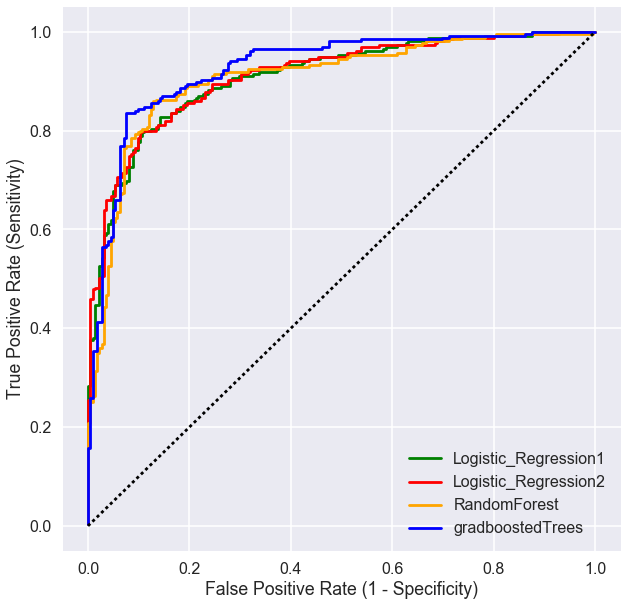

In [167]:
## works for BINARY Labels == 1 vs 0 from True False
from sklearn.metrics import roc_auc_score, roc_curve

# pltcolor = ['orange','g','r']
pltcolor = ['g','r','orange','blue']
cnt=0
for name, model in models.items():
    
    mFit = model.fit(X_train, ytrain)
    y_pred = mFit.predict(X_test)
    yH_pred = mFit.predict(X_testhold)
    
    y_prob = mFit.predict_proba(X_test)[:,1] ##
    yH_prob = mFit.predict_proba(X_testhold)[:,1] ##


    #y_pred = mFit.predict(X_holdout)
    
    print('Model: '+name)
    print('AUC_test:  ', roc_auc_score(ytest,y_pred))
    print('AUC_holdout:  ', roc_auc_score(ytest_hold, yH_pred))
    
#     fpr, tpr, thresholds = roc_curve(ytest,y_prob,pos_label=1)
    fpr, tpr, thresholds = roc_curve(ytest_hold,yH_prob,pos_label=1)
    
    
    plt.figure(1,figsize=[10,10])
    plt.subplot(1,1,1)
    plot_roc_curves(fpr,tpr,pltcolor[cnt])
    plt.legend(list(models.keys()),loc='best')
    print()

    cnt+=1
    if cnt >= len(list(models.items())):
        plt.plot(fpr,fpr, 'k:');
        

#     https://www.kaggle.com/wiki/AreaUnderCurve

In [168]:
name = 'gradboostedTrees'
model = models['gradboostedTrees']

scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 10)
print('Model: '+name)
print("Score: " + str(np.mean(scores)))
print ()

mFit = model.fit(X_train, ytrain)
y_pred = mFit.predict(X_test)

print('Model: '+name)
#print(precision_recall_fscore_support(y_test1, y_pred1, average='binary'))
print(classification_report(ytest, y_pred)) #, target_names=list(y_test.unique())))
print ()

cnf_matrixGBT = metrics.confusion_matrix(ytest, y_pred)


Model: gradboostedTrees
Score: 0.81925673918

Model: gradboostedTrees
             precision    recall  f1-score   support

          0       0.81      0.81      0.81       284
          1       0.82      0.82      0.82       292

avg / total       0.82      0.82      0.82       576




In [169]:
yH_pred = mFit.predict(X_testhold)
print(classification_report(ytest_hold, yH_pred))

metrics.confusion_matrix(ytest_hold, yH_pred)

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       225
          1       0.89      0.85      0.87       255

avg / total       0.86      0.86      0.86       480



array([[197,  28],
       [ 39, 216]])

In [170]:
cnf_matrixGBT_hold = metrics.confusion_matrix(ytest_hold, yH_pred)

Confusion matrix, without normalization


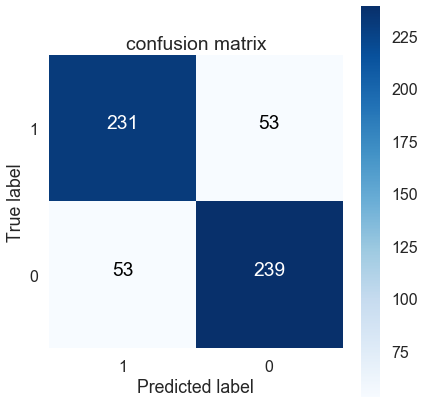

[[ 0.81  0.19]
 [ 0.18  0.82]]
Normalized confusion matrix


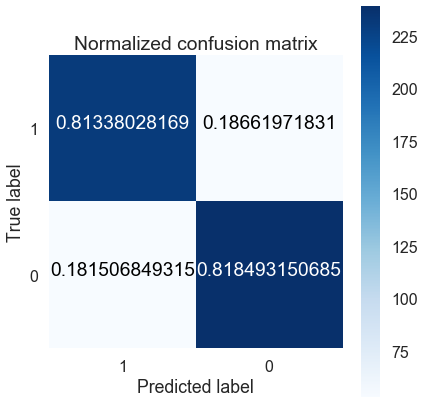

Confusion matrix, without normalization


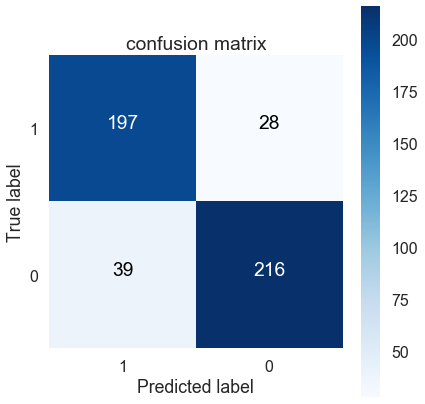

[[ 0.88  0.12]
 [ 0.15  0.85]]
Normalized confusion matrix


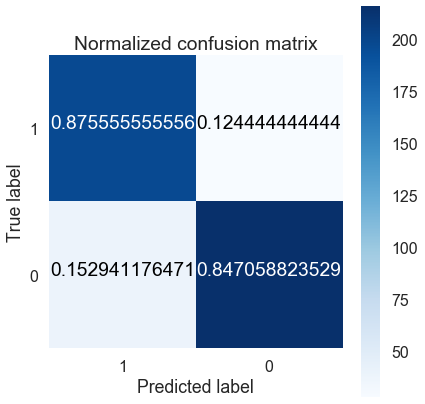

In [171]:
plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT, classes=ytest.unique(), 
                      title='confusion matrix')
plt.grid(None)
plt.show()

plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT, classes=ytest.unique(), normalize=True,
                      title='Normalized confusion matrix')
plt.grid(None)
plt.show()


plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT_hold, classes=ytest_hold.unique(), 
                      title='confusion matrix')
plt.grid(None)
plt.show()

plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT_hold, classes=ytest_hold.unique(), normalize=True,
                      title='Normalized confusion matrix')
plt.grid(None)
plt.show()

In [172]:
name = 'Logistic_Regression1'
model = models['Logistic_Regression1']

scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 10)
print('Model: '+name)
print("Score: " + str(np.mean(scores)))
print ()

LmFit = model.fit(X_train, ytrain)
Ly_pred = LmFit.predict(X_test)

print('Model: '+name)
#print(precision_recall_fscore_support(y_test1, y_pred1, average='binary'))
print(classification_report(ytest, Ly_pred)) #, target_names=list(y_test.unique())))
print ()

cnf_matrixLR = metrics.confusion_matrix(ytest, Ly_pred)


LyH_pred = LmFit.predict(X_testhold)
print(classification_report(ytest_hold, LyH_pred))

metrics.confusion_matrix(ytest_hold, LyH_pred)

cnf_matrixLR_hold = metrics.confusion_matrix(ytest_hold, LyH_pred)


Model: Logistic_Regression1
Score: 0.793916691055

Model: Logistic_Regression1
             precision    recall  f1-score   support

          0       0.80      0.81      0.81       284
          1       0.82      0.80      0.81       292

avg / total       0.81      0.81      0.81       576


             precision    recall  f1-score   support

          0       0.81      0.84      0.83       225
          1       0.85      0.83      0.84       255

avg / total       0.83      0.83      0.83       480



### Old Model

Plot Feature Impt Refs   
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    


In [173]:
# mFit.feature_importances_
FeaturesDF = pd.DataFrame(sorted(zip(X_testhold.columns, mFit.feature_importances_)) )
FeaturesDF.columns = ['FeatureCode','relativeImp']
FeaturesDF['FeatureImp'] = 100.0 * (FeaturesDF.relativeImp / FeaturesDF.relativeImp.max())

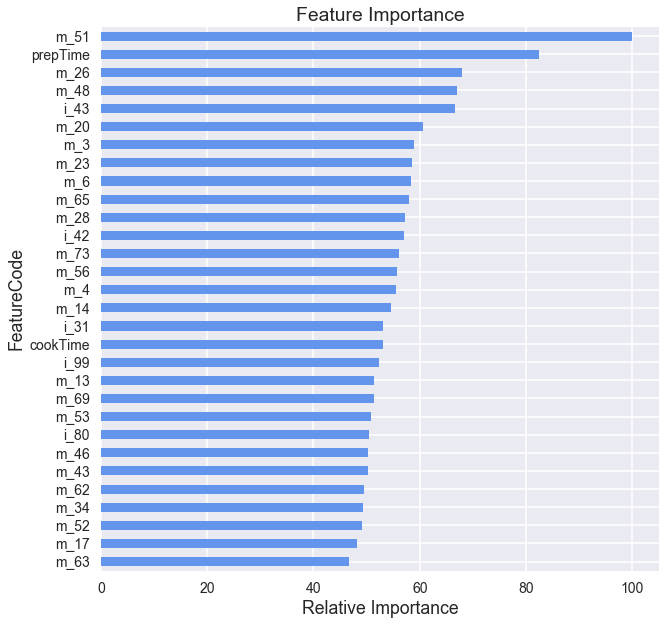

In [174]:
FeaturesDF2 = FeaturesDF.sort_values(by=['FeatureImp'],ascending=False)
FeaturesDF2 = FeaturesDF2.reset_index()#.FeatureImp.sort_values(ascending=False).head(20).plot.barh()
FeaturesDF2.index = FeaturesDF2.FeatureCode

FeaturesDF2.FeatureImp.head(30).sort_values(ascending=True).plot.barh(figsize=(10,10),
                                                                      title='Feature Importance', 
                                                                      color='cornflowerblue',
                                                                      fontsize=14);
plt.xlabel('Relative Importance');

In [ ]:
# MTopic 51: 
# chocol whisk cream bowl white egg mixtur melt sugar fold gentl yolk meringu set spoon cool put water peak thick
    
# PrepTime

# MTopic 26
# tin base temperatur remov room loaf top banana oven hrs line even remain combin shelf side press slice pour cool

# MTopic 48
# bake oven butter cool fan/ga mix flour sugar mixtur egg 180c/160c golden beat parchment tray bowl spoon line melt tin

# MTopic 20
# tin bake come mix cake skewer clean cool mixtur oven butter insert flour greas parchment togeth line syrup bowl centr

# MTopic 3
# potato mash drain boil salt tender water pea veg season gas butter fan/ fri tip pepper parsnip well top meanwhil

# MTopic 23
# meat beef red wine realli brown hrs well sprout chestnut shred longer bulghar slow wheat lot babi cooker bit done

# MTopic 6
# appl sugar pud custard cream butter caramel top dish ice basin pour vanilla sauc cinnamon togeth milk scoop crumbl pulp

# MTopic 65
# chicken fri pepper minut reduc prefer salt salad bit leav without around season continu side start sauc throw take mash

# MTopic 28
# sparkl 350ml barley griddl centr 180c/ submerg bring get 4/fan tini mouss join slot glitter thyme toffe final churn remov



# ITopic 43
# cream doubl sugar vanilla milk butter strawberri biscuit pod egg-egg-yolk good-qual ice extract egg gelatin

# ITopic 42
# lime coriand chilli red leav fish sauc serv sugar past thai peanut mint wedg milk

# ITopic 31
# flour plain milk butter egg nutmeg gruyer leav powder pud self-rais gluten-fre suet onion bake

# ITopic 99
# sugar flour butter egg powder vanilla extract bake self-rais plain caster milk almond ice jam

# ITopic 80
# littl blueberri passion wrap mirin jalapeno dessert crisp guacamol bloo-bear-e butter egg flour cassi bake



In [ ]:
FeaturesDF2.FeatureImp.head(60).sort_values(ascending=True).plot.barh(figsize=(10,18),
                                                                      title='Feature Importance', 
                                                                      color='cornflowerblue',
                                                                      fontsize=14);
plt.xlabel('Relative Importance');

In [ ]:
# sorted_features = pd.DataFrame(sorted(zip(X_testhold.columns, LmFit.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True))
# sorted_features

In [175]:
# mFit.feature_importances_
# LR_FeaturesDF = pd.DataFrame(sorted(zip(X_testhold.columns, LmFit.coef_[0])) )
LR_FeaturesDF = pd.DataFrame(sorted(zip(X_testhold.columns, LmFit.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True))

LR_FeaturesDF.columns = ['FeatureCode','relativeImp']
LR_FeaturesDF['FeatureImp'] = 100.0 * (LR_FeaturesDF.relativeImp / LR_FeaturesDF.relativeImp.abs().max())


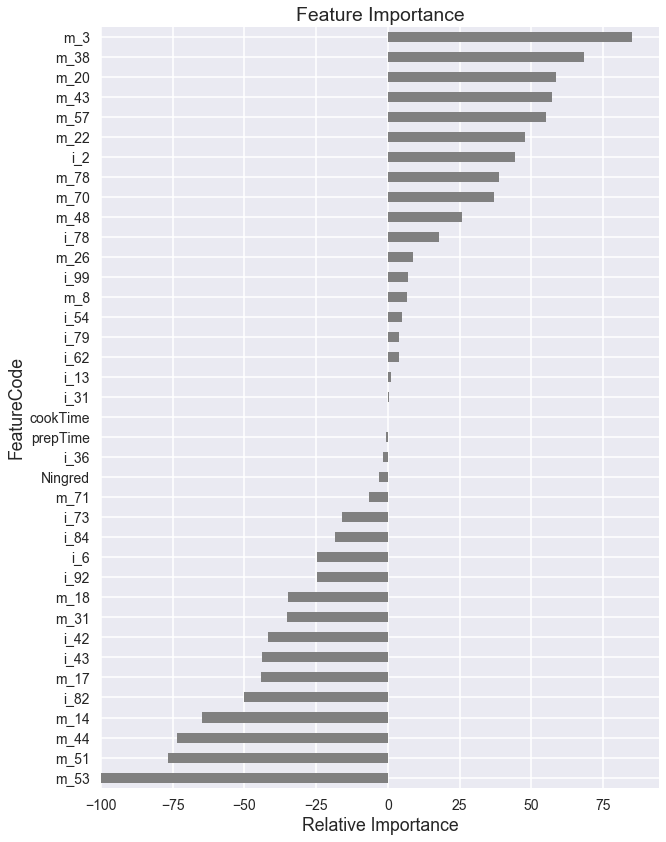

In [176]:
LR_FeaturesDF2 = LR_FeaturesDF.sort_values(by=['FeatureImp'],ascending=False)
LR_FeaturesDF2 = LR_FeaturesDF2.reset_index()#.FeatureImp.sort_values(ascending=False).head(20).plot.barh()
LR_FeaturesDF2.index = LR_FeaturesDF2.FeatureCode

# LR_FeaturesDF2.FeatureImp.sort_values(ascending=True).plot.barh(figsize=(10,20),title='Feature Importance', color='g');
LR_FeaturesDF2.FeatureImp[LR_FeaturesDF2.FeatureImp!=0].sort_values(ascending=True).plot.barh(figsize=(10,14),
                                                                                              title='Feature Importance', 
                                                                                              color=['gray'], 
                                                                                              fontsize=14);
plt.xlabel('Relative Importance');
# plt.rcParams.update({'font.size': 10})

In [ ]:
*MTopic 3:
potato mash drain boil salt tender water pea veg season gas butter fan/ fri tip pepper parsnip well top meanwhil

*MTopic 38:
pasta pack instruct water follow drain reserv meanwhil boil tip pesto fri toss larg parmesan accord garlic sauc well season

*MTopic 20:
tin bake come mix cake skewer clean cool mixtur oven butter insert flour greas parchment togeth line syrup bowl centr

*MTopic 43:
simmer stock cream leek saucepan soup bring veget season cauliflow boil shell gentl tast bread butter sour pour soft larg

*MTopic 57:
coriand chilli lime onion fri past coconut curri spice juic garlic water leav ginger rice simmer larg bean tomato tip

*MTopic 22:
fri onion season brown garlic simmer larg sauc cover stock remov pour soften dish mushroom tip butter golden bring reduc

# MTopic 78:
# dish chees broccoli chip pancetta breadcrumb salt sprinkl drain grate golden bake well ovenproof larg cheddar mix sauc bubbl mustard

# MTopic 26:
# tin base temperatur remov room loaf top banana oven hrs line even remain combin shelf side press slice pour cool

# MTopic 8:
# cake ice top beat sugar tin make smooth spong cool spread use chocol layer butter half bake line togeth littl

*ITopic 2:
garlic clove chicken oliv breast onion stock parsley oregano tomato thigh leav butter boneless pearl

# ITopic 99:
# sugar flour butter egg powder vanilla extract bake self-rais plain caster milk almond ice jam





*MTopic 53:
cut use slice peel knife place set remov leav half ani strip chop thin piec away skin sharp board care

*MTopic 51:
chocol whisk cream bowl white egg mixtur melt sugar fold gentl yolk meringu set spoon cool put water peak thick

*MTopic 44:
roast oven tin foil juic fat skin rest duck remov fan/ga place leav leg salt ani put rub cover make

*MTopic 14:
roll edg brush cut bake sheet top pastri one use littl make film piec cling side around wrap end fill

*MTopic 17:
water boil bring pour put leav drain larg saucepan remov simmer cover cool liquid cold gentl set jug strain salt

# MTopic 31:
# egg fri paper make kitchen warm flour plate batter set keep golden well spoon bowl larg non-stick pancak mix salt

# MTopic 18:
# pastri bake oven tart tin fill egg pie case line remov bean flour chill cool golden fan/ga light roll togeth

*ITopic 82:
white wine larg dri chive wild egg ready-mad chicori crabmeat packet butter head truffl bah-nah-nah

# ITopic 43:
# cream doubl sugar vanilla milk butter strawberri biscuit pod egg-egg-yolk good-qual ice extract egg gelatin

# ITopic 42:
# lime coriand chilli red leav fish sauc serv sugar past thai peanut mint wedg milk

# ITopic 92:
# salt water flour yeast white strong bread oliv sprout brussel butter chipolata fast-act greas semolina

# ITopic 6:
# sugar caster lemon egg-whit cornflour whole butter fromag frai christma egg-yolk organ zest egg ice

# ITopic 84:
# unsalt butter lemon colour food pack sugar curd white ready-to-rol poppi elderflow rose cordial sprinkl

# ITopic 73:
# almond raspberri serv flake extra peach thick vegetarian altern 50gram 100gram grate gooseberri leav shortbread



In [ ]:
LR_FeaturesDF2.FeatureImp[LR_FeaturesDF2.FeatureImp!=0]

In [ ]:
# LmFit.predict_proba(X_test)

In [ ]:
X_testhold.columns

### Test Model to try predict prepDiff of recipes not used in modelling :

In [ ]:
Ing.prepDifficulty.value_counts()

In [81]:
# df_easy2 = Ing.ix[IDXeasy.index.tolist()][1201:]#

df_easy2 = Ing.ix[IDXeasy.index.tolist()][-386:]#
df_effort2 = Ing.ix[IDXmoreEffort.index.tolist()][1201:]#
df_challenge2 = Ing.ix[IDXchallenge.index.tolist()][:]

# df = pd.concat([df_easy2,df_effort2],axis=0)
df = pd.concat([df_easy2,df_effort2,df_challenge2],axis=0)

# df = df_easy2
# df = df_effort2
# df = df_challenge2
print(df.shape) 

TestXYLabel = df.prepDifficulty.to_frame()#.reset_index()
# TestXYLabel.index.tolist()

(772, 7)


In [82]:
df_easy2.shape, df_effort2.shape, df_challenge2.shape, df.shape

((386, 7), (163, 7), (223, 7), (772, 7))

In [83]:
XYtestIng = Ing.ix[TestXYLabel.index.tolist()].ix[:,1:]

In [84]:
X2 = XYtestIng.ix[:,:5]
Y2 = XYtestIng.ix[:,5].to_frame()

print(len(Y2.prepDifficulty.unique().tolist()) )

Y2['prepDiffnum'] = Y2.prepDifficulty
Y2['prepDiffnum'] = Y2.prepDiffnum.apply(lambda x: int(x=='Easy'))


3


In [85]:
Y2.prepDiffnum.unique().tolist(), Y2.prepDifficulty.unique().tolist()

([1, 0], ['Easy', 'More effort', 'A challenge'])

In [86]:
## Convert Raw string items to vec
## Apply LDA modelling... pick some components rather than all... 

iX2_vec = itf_vectorizer.transform(X2.ingred)
print(iX2_vec.shape)
# iX_train0 = pd.DataFrame(ilda_tfidf.transform(iX_train_vec))
iX2_0 = pd.DataFrame(ilda_tf.transform(iX2_vec))
iX2_0.columns = ['i_'+str(i) for i in range(iX2_0.shape[1])]
iX2_00 = iX2_0#[iidx]
iX2 = pd.concat([X2.reset_index()[['Ningred','prepTime','cookTime']],iX2_00],axis=1)
# iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train_vec],axis=1)
print(iX2.shape)


mX2_vec = mtf_vectorizer.transform(X2.method)
print(mX2_vec.shape)
# mX_train0 = pd.DataFrame(mlda_tfidf.transform(mX_train_vec))
mX2_0 = pd.DataFrame(mlda_tf.transform(mX2_vec))
mX2_0.columns = ['m_'+str(m) for m in range(mX2_0.shape[1])]
mX2 = mX2_0#[[0,1,2,79]]
print(mX2.shape)

# X_train_vec = hstack([iX_train_vec,mX_train_vec]).todense()#.toarray()
# print(X_train_vec.shape)
X2test = pd.concat([iX2,mX2],axis=1)
print(X2test.shape)



(772, 741)
(772, 103)
(772, 1638)
(772, 80)
(772, 183)


In [ ]:
# LmFit.predict_proba(X2test)

In [59]:
# test only all unused df_effort2
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       1.00      0.88      0.93       163
          1       0.00      0.00      0.00         0

avg / total       1.00      0.88      0.93       163



/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[143,  20],
       [  0,   0]])

In [66]:
# test only all unused df_challenge2
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       1.00      0.93      0.96       223
          1       0.00      0.00      0.00         0

avg / total       1.00      0.93      0.96       223



/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[207,  16],
       [  0,   0]])

In [73]:
# test only all unused df_easy2
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.70      0.83      7263

avg / total       1.00      0.70      0.83      7263



/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[   0,    0],
       [2149, 5114]])

In [80]:
## all unused labels -- more easy than effort+challenge
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       0.14      0.91      0.24       386
          1       0.99      0.70      0.82      7263

avg / total       0.95      0.71      0.79      7649



array([[ 350,   36],
       [2149, 5114]])

In [87]:
## all unused labels -- equal easy & effort+challenge
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       0.74      0.91      0.82       386
          1       0.88      0.69      0.77       386

avg / total       0.81      0.80      0.79       772



array([[350,  36],
       [121, 265]])